<a href="https://colab.research.google.com/github/WildArcher/CupIT2020/blob/master/cup_it_final_Copy2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [0]:
data = pd.read_csv('CL_megafon_Cup IT_2020_final_data.csv', sep=';')

In [0]:
data['time_start'] = pd.to_datetime(data['time_start'])
data['time_end'] = pd.to_datetime(data['time_end'])

In [159]:
data['duration'] = data['time_end'] - data['time_start']
data['min']= data['duration'].dt.seconds/60
data

,time_start,time_end,place_latitude,place_longitude,duration,min
0,2019-08-24 14:23:56,2019-08-24 18:54:47,28.102908,113.617867,04:30:51,270.850000
1,2018-06-19 08:56:22,2018-06-19 12:15:26,28.102908,113.617867,03:19:04,199.066667
2,2018-08-29 14:00:32,2018-08-29 14:37:51,28.102908,113.617867,00:37:19,37.316667
3,2019-12-10 16:01:26,2019-12-10 16:35:22,28.102908,113.617867,00:33:56,33.933333
4,2019-12-10 13:39:42,2019-12-10 17:58:22,28.999495,115.167583,04:18:40,258.666667
...,...,...,...,...,...,...
78218,2018-06-25 11:25:04,2018-06-25 14:39:32,28.945221,114.357402,03:14:28,194.466667
78219,2018-04-06 10:07:13,2018-04-06 16:34:40,28.619318,114.397573,06:27:27,387.450000
78220,2018-07-13 22:59:34,2018-07-14 00:05:50,28.619318,114.397573,01:06:16,66.266667
78221,2018-11-06 00:05:57,2018-11-06 08:50:10,28.619318,114.397573,08:44:13,524.216667


In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78223 entries, 0 to 78222
Data columns (total 6 columns):
time_start         78223 non-null datetime64[ns]
time_end           78223 non-null datetime64[ns]
place_latitude     78223 non-null float64
place_longitude    78223 non-null float64
duration           78223 non-null timedelta64[ns]
min                78223 non-null float64
dtypes: datetime64[ns](2), float64(3), timedelta64[ns](1)
memory usage: 3.6 MB


In [161]:
index_fast_repare_in_one_minute = []
for i in range(data.shape[0]):
    if data['duration'][i] == 0:
        index_fast_repare_in_one_minute.append(i)
        
print(len(index_fast_repare_in_one_minute), 'обрывов закончились в ту же секунду')

0 обрывов закончились в ту же секунду


In [162]:
from datetime import datetime

index_fast_repare_in_one_minute = []
for i in range(data.shape[0]):
    if data['min'][i] <=2:
        index_fast_repare_in_one_minute.append(i)
        
print(len(index_fast_repare_in_one_minute), 'обрывов закончились меньше чем за 2 минуты')

100 обрывов закончились меньше чем за 2 минуты


In [163]:
index_fast_repare_in_one_minute = []
for i in range(data.shape[0]):
    if data['min'][i] <=60:
        index_fast_repare_in_one_minute.append(i)
        
print(len(index_fast_repare_in_one_minute), 'обрывов закончились меньше чем за час')

19186 обрывов закончились меньше чем за час


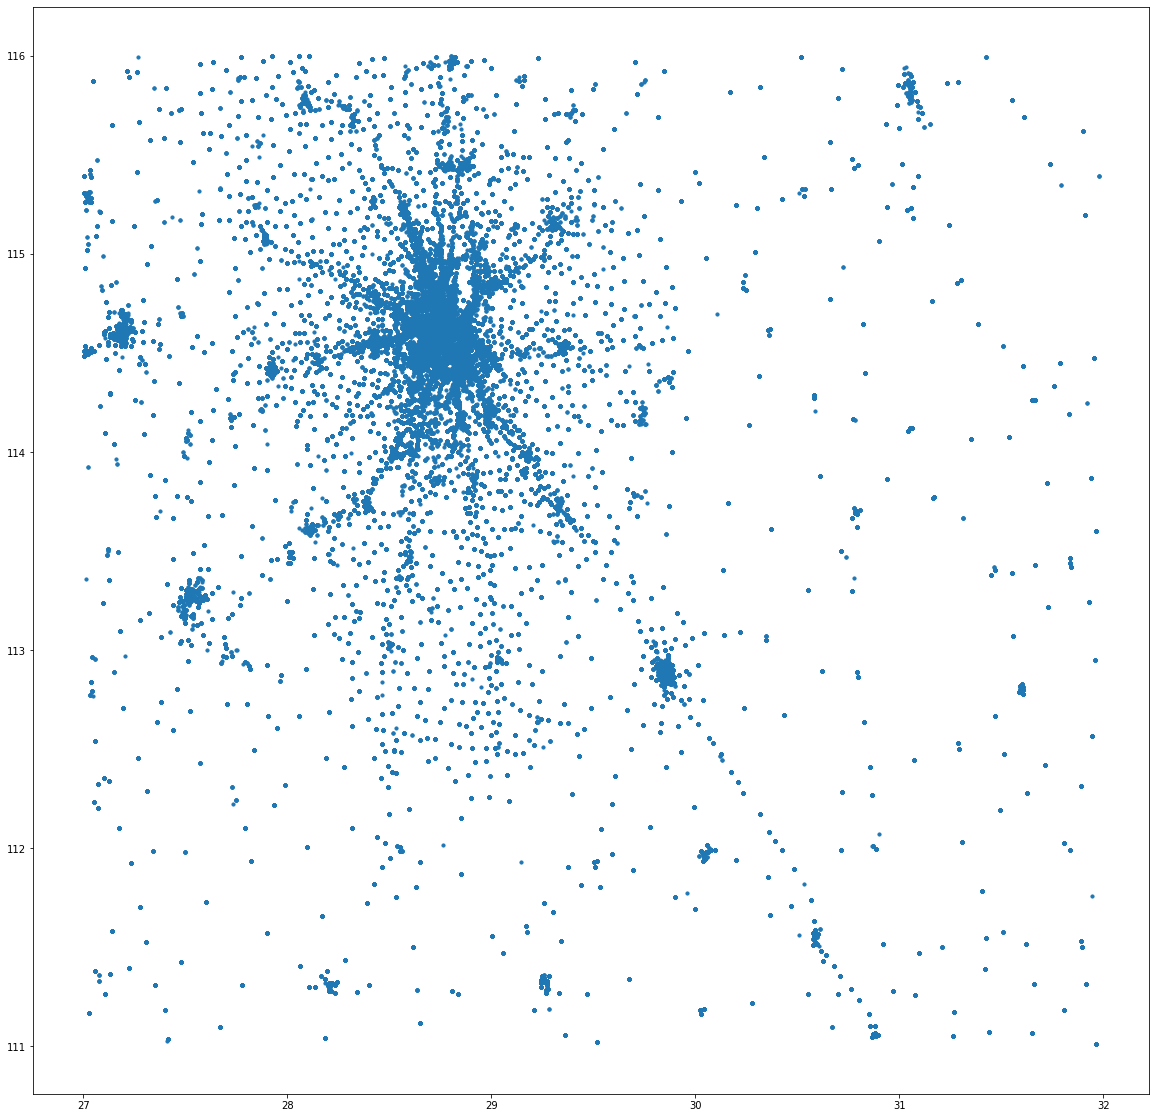

In [164]:
fig, axes = plt.subplots(figsize=(20, 20))
plt.scatter(data['place_latitude'].values.reshape(-1,1), data['place_longitude'].values.reshape(-1,1), s=10)

In [0]:
data_target = data['min'].copy()

In [166]:
data

,time_start,time_end,place_latitude,place_longitude,duration,min
0,2019-08-24 14:23:56,2019-08-24 18:54:47,28.102908,113.617867,04:30:51,270.850000
1,2018-06-19 08:56:22,2018-06-19 12:15:26,28.102908,113.617867,03:19:04,199.066667
2,2018-08-29 14:00:32,2018-08-29 14:37:51,28.102908,113.617867,00:37:19,37.316667
3,2019-12-10 16:01:26,2019-12-10 16:35:22,28.102908,113.617867,00:33:56,33.933333
4,2019-12-10 13:39:42,2019-12-10 17:58:22,28.999495,115.167583,04:18:40,258.666667
...,...,...,...,...,...,...
78218,2018-06-25 11:25:04,2018-06-25 14:39:32,28.945221,114.357402,03:14:28,194.466667
78219,2018-04-06 10:07:13,2018-04-06 16:34:40,28.619318,114.397573,06:27:27,387.450000
78220,2018-07-13 22:59:34,2018-07-14 00:05:50,28.619318,114.397573,01:06:16,66.266667
78221,2018-11-06 00:05:57,2018-11-06 08:50:10,28.619318,114.397573,08:44:13,524.216667


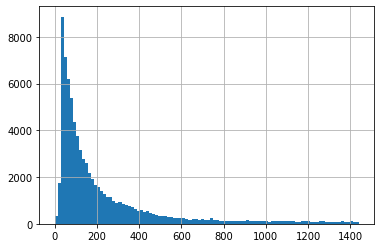

In [167]:
data['min'].hist(bins=100)

In [0]:
low, up = np.percentile(data['min'].values, [1 , 95]) 

bad_index = list(data[data['min'].values > up].index)

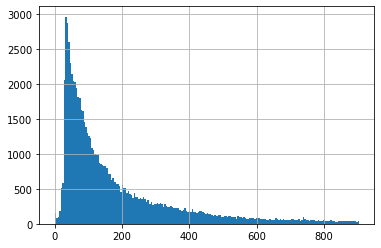

In [169]:
data['min'].drop(index=bad_index).hist(bins=200)

In [0]:
data.drop(index=bad_index, inplace=True)
data.index = range(data.shape[0])

## MeanShift

In [0]:
from sklearn.cluster import MeanShift

In [0]:
new_data = data[['place_latitude', 'place_longitude']].copy()

In [173]:
new_data

,place_latitude,place_longitude
0,28.102908,113.617867
1,28.102908,113.617867
2,28.102908,113.617867
3,28.102908,113.617867
4,28.999495,115.167583
...,...,...
74306,28.945221,114.357402
74307,28.945221,114.357402
74308,28.619318,114.397573
74309,28.619318,114.397573


In [174]:
%%time

clustering = MeanShift(bandwidth = 0.1, n_jobs=-1).fit(new_data)

CPU times: user 19.1 s, sys: 1.66 s, total: 20.7 s
Wall time: 7min 59s


In [175]:
len(np.unique(clustering.predict(new_data)))

518

In [0]:
new_data['class'] = clustering.predict(new_data)

In [177]:
new_data

,place_latitude,place_longitude,class
0,28.102908,113.617867,58
1,28.102908,113.617867,58
2,28.102908,113.617867,58
3,28.102908,113.617867,58
4,28.999495,115.167583,42
...,...,...,...
74306,28.945221,114.357402,14
74307,28.945221,114.357402,14
74308,28.619318,114.397573,2
74309,28.619318,114.397573,2


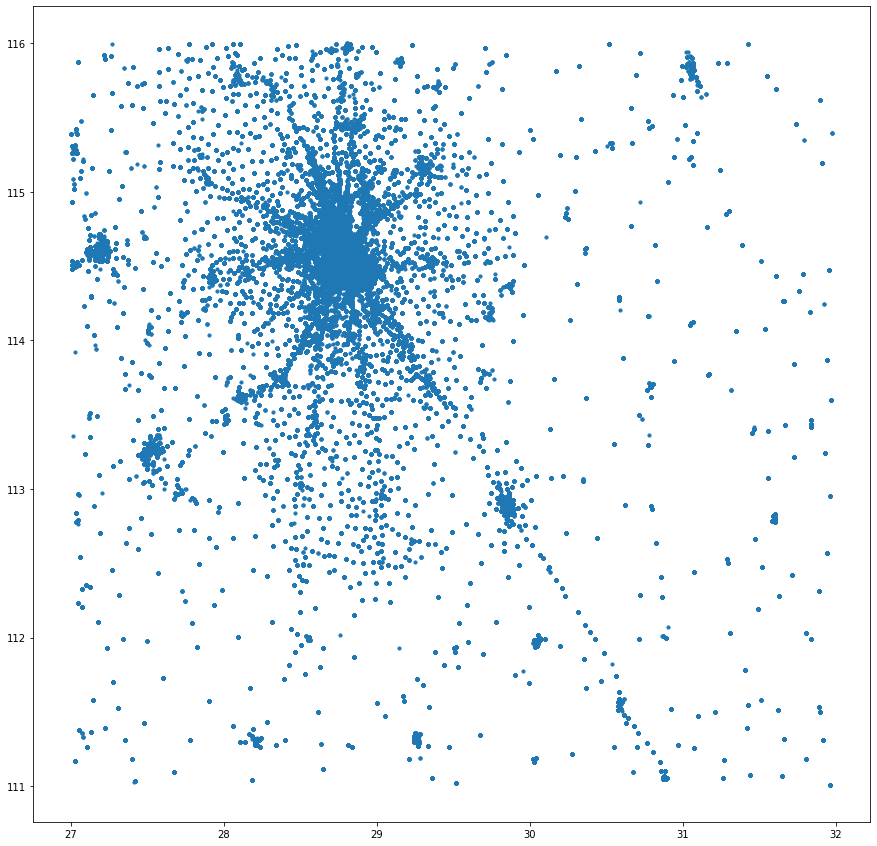

In [178]:
fig, axes = plt.subplots(figsize=(15, 15))
plt.scatter(new_data['place_latitude'].values.reshape(-1,1), 
            new_data['place_longitude'].values.reshape(-1,1), s=10)

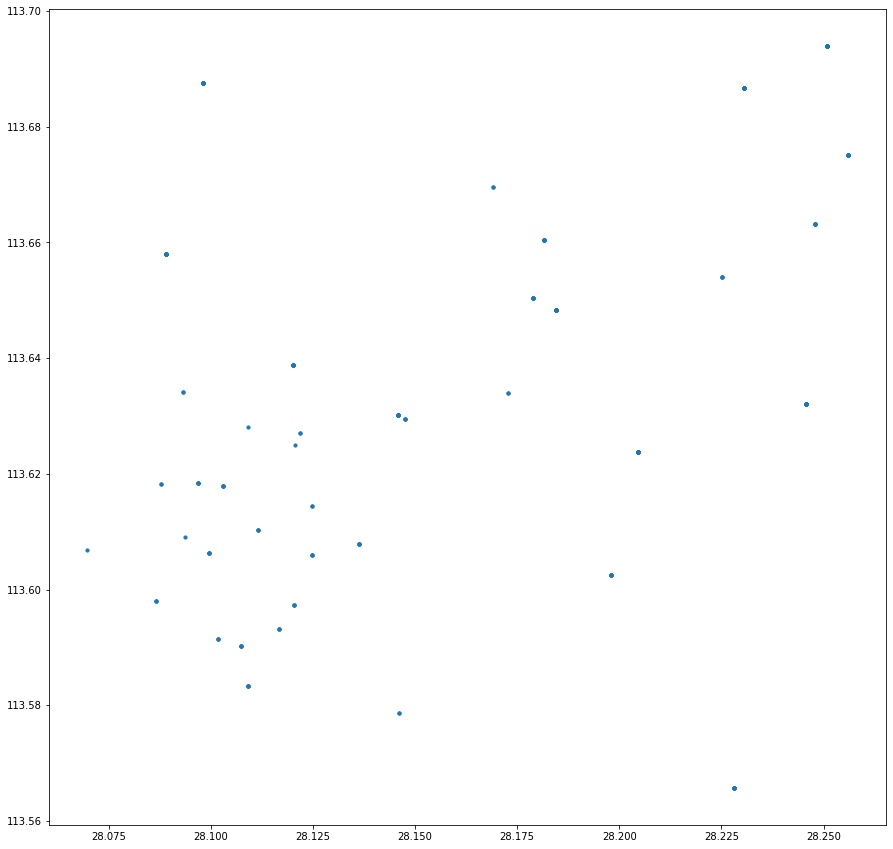

In [179]:
fig, axes = plt.subplots(figsize=(15, 15))
plt.scatter(new_data['place_latitude'][new_data['class'] == 58].values.reshape(-1,1), 
            new_data['place_longitude'][new_data['class'] == 58].values.reshape(-1,1), s=10)

In [0]:
data['class'] = new_data['class']

In [181]:
data

,time_start,time_end,place_latitude,place_longitude,duration,min,class
0,2019-08-24 14:23:56,2019-08-24 18:54:47,28.102908,113.617867,04:30:51,270.850000,58
1,2018-06-19 08:56:22,2018-06-19 12:15:26,28.102908,113.617867,03:19:04,199.066667,58
2,2018-08-29 14:00:32,2018-08-29 14:37:51,28.102908,113.617867,00:37:19,37.316667,58
3,2019-12-10 16:01:26,2019-12-10 16:35:22,28.102908,113.617867,00:33:56,33.933333,58
4,2019-12-10 13:39:42,2019-12-10 17:58:22,28.999495,115.167583,04:18:40,258.666667,42
...,...,...,...,...,...,...,...
74306,2018-09-28 10:17:20,2018-09-28 14:33:46,28.945221,114.357402,04:16:26,256.433333,14
74307,2018-06-25 11:25:04,2018-06-25 14:39:32,28.945221,114.357402,03:14:28,194.466667,14
74308,2018-04-06 10:07:13,2018-04-06 16:34:40,28.619318,114.397573,06:27:27,387.450000,2
74309,2018-07-13 22:59:34,2018-07-14 00:05:50,28.619318,114.397573,01:06:16,66.266667,2


In [0]:
data_for_time_series = data[['time_start', 'min']][data['class'] == 58].copy()

In [0]:
data_for_time_series = data_for_time_series.iloc[:, :4]

## Time series для одного кластера


In [0]:
import sys
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from scipy.optimize import minimize

from sklearn.linear_model import LinearRegression

In [204]:
data_for_time_series

,time_start,min
0,2019-08-24 14:23:56,270.850000
1,2018-06-19 08:56:22,199.066667
2,2018-08-29 14:00:32,37.316667
3,2019-12-10 16:01:26,33.933333
1110,2018-08-07 20:36:49,72.900000
...,...,...
72561,2019-12-25 11:38:35,175.283333
72562,2019-12-20 11:04:25,409.916667
72563,2019-12-10 16:26:18,84.616667
72866,2019-01-20 17:59:36,155.833333


In [0]:
def code_mean(data, cat_feature, real_feature):
    return dict(data.groupby(cat_feature)[real_feature].mean())

In [205]:
data_for_time_series.index = data_for_time_series['time_start']
data_for_time_series["year"] = data_for_time_series.index.year
data_for_time_series["month"] = data_for_time_series.index.month
data_for_time_series["weekday"] = data_for_time_series.index.weekday
data_for_time_series["hour"] = data_for_time_series.index.hour
data_for_time_series["minute"] = data_for_time_series.index.minute
#data_for_time_series['is_weekend'] = data_for_time_series.weekday.isin([5,6])*1
data_for_time_series.drop(labels=['time_start'], inplace=True, axis=1)
data_for_time_series.head()

,min,year,month,weekday,hour,minute
time_start,,,,,,
2019-08-24 14:23:56,270.850000,2019,8,5,14,23
2018-06-19 08:56:22,199.066667,2018,6,1,8,56
2018-08-29 14:00:32,37.316667,2018,8,2,14,0
2019-12-10 16:01:26,33.933333,2019,12,1,16,1
2018-08-07 20:36:49,72.900000,2018,8,1,20,36


In [190]:
code_mean(data_for_time_series, 'weekday', 'min')

{0: 215.42863247863244,
 1: 139.52840909090912,
 2: 172.64549549549548,
 3: 157.1650326797386,
 4: 186.56399999999994,
 5: 228.80040650406505,
 6: 206.1229166666666}

In [0]:
def prepareData(data, lag_start, lag_end, test_size):

    data = pd.DataFrame(data.copy())

    test_index = int(len(data)*(1-test_size))

    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data['min'].shift(i)
    
    #data['year_average'] = list(map(code_mean(data[:test_index], 'year', 'min').get, data.year))
    data['month_average'] = list(map(code_mean(data[:test_index], 'month', 'min').get, data.month))
    data['weekday_average'] = list(map(code_mean(data[:test_index], 'weekday', 'min').get, data.weekday))
    data["hour_average"] = list(map(code_mean(data[:test_index], 'hour', 'min').get, data.hour))
    #data["minute_average"] = list(map(code_mean(data[:test_index], 'minute', 'min').get, data.minute))

    data.drop(['year', 'month', 'weekday', 'hour', 'minute'], axis=1, inplace=True)
    data = data.dropna()
    data = data.reset_index(drop=True)

    X_train = data.loc[:test_index].drop(['min'], axis=1)
    y_train = data.loc[:test_index]['min']
    X_test = data.loc[test_index:].drop(['min'], axis=1)
    y_test = data.loc[test_index:]['min']

    return X_train, X_test, y_train, y_test

In [0]:
from sklearn.linear_model import ARDRegression

In [319]:
data_for_time_series

,min,year,month,weekday,hour,minute
time_start,,,,,,
2019-08-24 14:23:56,270.850000,2019,8,5,14,23
2018-06-19 08:56:22,199.066667,2018,6,1,8,56
2018-08-29 14:00:32,37.316667,2018,8,2,14,0
2019-12-10 16:01:26,33.933333,2019,12,1,16,1
2018-08-07 20:36:49,72.900000,2018,8,1,20,36
...,...,...,...,...,...,...
2019-12-25 11:38:35,175.283333,2019,12,2,11,38
2019-12-20 11:04:25,409.916667,2019,12,4,11,4
2019-12-10 16:26:18,84.616667,2019,12,1,16,26


In [325]:
X_train

,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,lag_25,lag_26,lag_27,lag_28,lag_29,lag_30,lag_31,lag_32,lag_33,lag_34,lag_35,lag_36,lag_37,lag_38,lag_39,lag_40,lag_41,lag_42,lag_43,lag_44,lag_45,lag_46,lag_47,month_average,weekday_average,hour_average
0,36.800000,111.500000,69.983333,235.100000,111.300000,30.400000,110.283333,379.566667,58.483333,359.516667,99.133333,378.183333,84.950000,229.400000,34.816667,127.066667,170.066667,28.833333,48.350000,68.416667,135.666667,45.133333,206.583333,133.516667,92.083333,413.016667,58.733333,110.333333,80.216667,287.150000,539.700000,72.900000,33.933333,37.316667,199.066667,270.850000,204.502151,236.560476,218.276667
1,75.666667,36.800000,111.500000,69.983333,235.100000,111.300000,30.400000,110.283333,379.566667,58.483333,359.516667,99.133333,378.183333,84.950000,229.400000,34.816667,127.066667,170.066667,28.833333,48.350000,68.416667,135.666667,45.133333,206.583333,133.516667,92.083333,413.016667,58.733333,110.333333,80.216667,287.150000,539.700000,72.900000,33.933333,37.316667,199.066667,149.577083,166.791379,218.276667
2,63.816667,75.666667,36.800000,111.500000,69.983333,235.100000,111.300000,30.400000,110.283333,379.566667,58.483333,359.516667,99.133333,378.183333,84.950000,229.400000,34.816667,127.066667,170.066667,28.833333,48.350000,68.416667,135.666667,45.133333,206.583333,133.516667,92.083333,413.016667,58.733333,110.333333,80.216667,287.150000,539.700000,72.900000,33.933333,37.316667,149.577083,154.475000,133.077778
3,272.283333,63.816667,75.666667,36.800000,111.500000,69.983333,235.100000,111.300000,30.400000,110.283333,379.566667,58.483333,359.516667,99.133333,378.183333,84.950000,229.400000,34.816667,127.066667,170.066667,28.833333,48.350000,68.416667,135.666667,45.133333,206.583333,133.516667,92.083333,413.016667,58.733333,110.333333,80.216667,287.150000,539.700000,72.900000,33.933333,153.615741,154.475000,170.421605
4,76.266667,272.283333,63.816667,75.666667,36.800000,111.500000,69.983333,235.100000,111.300000,30.400000,110.283333,379.566667,58.483333,359.516667,99.133333,378.183333,84.950000,229.400000,34.816667,127.066667,170.066667,28.833333,48.350000,68.416667,135.666667,45.133333,206.583333,133.516667,92.083333,413.016667,58.733333,110.333333,80.216667,287.150000,539.700000,72.900000,204.502151,180.783740,193.135417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,80.433333,356.366667,63.183333,179.566667,309.866667,189.783333,157.866667,46.866667,48.700000,279.233333,472.383333,31.516667,44.833333,79.383333,77.450000,334.950000,81.750000,49.933333,46.083333,104.883333,32.450000,32.300000,222.650000,229.616667,361.083333,56.800000,47.016667,62.983333,92.966667,105.483333,288.983333,129.616667,146.500000,37.750000,446.733333,440.833333,204.502151,180.783740,170.421605
232,99.550000,80.433333,356.366667,63.183333,179.566667,309.866667,189.783333,157.866667,46.866667,48.700000,279.233333,472.383333,31.516667,44.833333,79.383333,77.450000,334.950000,81.750000,49.933333,46.083333,104.883333,32.450000,32.300000,222.650000,229.616667,361.083333,56.800000,47.016667,62.983333,92.966667,105.483333,288.983333,129.616667,146.500000,37.750000,446.733333,204.502151,198.303333,49.441667
233,82.133333,99.550000,80.433333,356.366667,63.183333,179.566667,309.866667,189.783333,157.866667,46.866667,48.700000,279.233333,472.383333,31.516667,44.833333,79.383333,77.450000,334.950000,81.750000,49.933333,46.083333,104.883333,32.450000,32.300000,222.650000,229.616667,361.083333,56.800000,47.016667,62.983333,92.966667,105.483333,288.983333,129.616667,146.500000,37.750000,121.455303,166.791379,140.891667
234,41.233333,82.133333,99.550000,80.433333,356.366667,63.183333,179.566667,309.866667,189.783333,157.866667,46.866667,48.700000,279.233333,472.383333,31.516667,44.833333,79.383333,77.450000,334.950000,81.750000,49.933333,46.083333,104.88

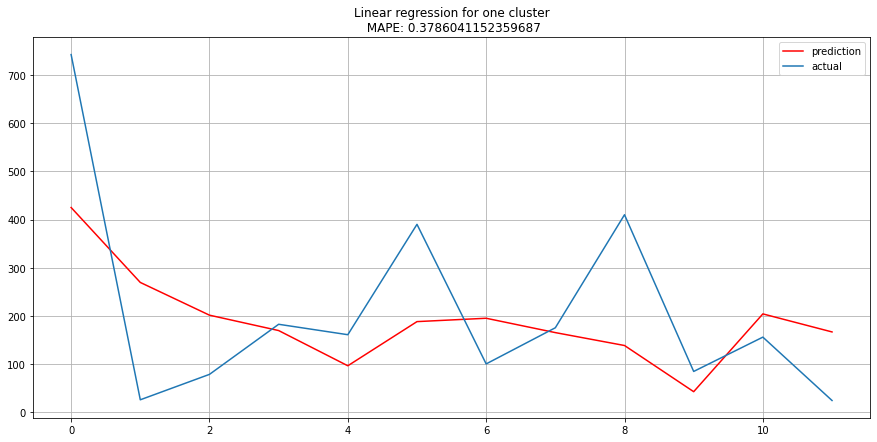

In [324]:
X_train, X_test, y_train, y_test = prepareData(data_for_time_series, test_size=0.2, lag_start=12, lag_end=48)
lr = ARDRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)
plt.figure(figsize=(15, 7))
plt.plot(prediction, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.legend(loc="best")
plt.title("Linear regression for one cluster\n MAPE: {}".format(1 - mean_absolute_error(prediction, y_test)/y_test.mean()))
plt.grid(True);